In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data reading and prep

In [2]:
obsim_mm_means_df = pd.read_csv('../analysis_exp9_tandem05_nodischadj/mmdata/obsim_mm_means_df.csv', index_col=0)
obsim_mm_means_df

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,...,condmeantime_blockedbyldr_approx,condmeantime_blockedbyldr_sim,condmeantime_blockedbypp_approx,condmeantime_blockedbypp_sim,ldr_effmean_svctime_approx,ldr_effmean_svctime_sim,prob_blockedby_ldr_approx,prob_blockedby_ldr_sim,prob_blockedby_pp_approx,prob_blockedby_pp_sim
1,1,0.20,0.999950,0.950000,0.950000,2.739726,0.1,0.5,0.5,2,...,3.777411,3.302721,6.360755,6.401959,11.910124,11.915456,0.055045,0.051427,2.319907e-02,0.021741
2,2,0.20,0.999950,0.950000,0.850000,2.739726,0.1,0.5,0.5,2,...,4.025554,4.516602,8.685350,8.924706,12.465833,12.460024,0.063434,0.064167,1.037940e-01,0.096679
3,3,0.20,0.999950,0.950000,0.750000,2.739726,0.1,0.5,0.5,2,...,4.480172,6.928997,11.090321,11.186948,13.419348,13.264692,0.079524,0.086926,2.001325e-01,0.186347
4,4,0.20,0.999950,0.850000,0.950000,2.739726,0.1,0.5,0.5,2,...,5.222543,4.409709,6.360755,6.459064,11.252472,11.513514,0.165739,0.162672,2.319907e-02,0.021980
5,5,0.20,0.999950,0.850000,0.850000,2.739726,0.1,0.5,0.5,2,...,5.581905,5.217347,8.685350,8.377886,11.706673,11.877527,0.181751,0.176401,1.037940e-01,0.098517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,0.25,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.000000,1.351404,0.000000,11.999993,12.008200,0.000009,0.000000,1.235314e-08,0.000000
147,147,0.30,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.050268,1.328353,0.000000,11.999993,12.008225,0.000009,0.000009,1.933882e-09,0.000000
148,148,0.20,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.043137,1.184546,0.000000,11.999996,12.002392,0.000006,0.000003,1.769363e-08,0.000000
149,149,0.25,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.047906,1.158626,0.000000,11.999996,12.003488,0.000006,0.000004,2.147217e-09,0.000000


In [3]:
obsim_mm_means_df.columns.to_list()

['scenario',
 'tot_c_rate',
 'acc_tar_obs',
 'acc_tar_ldr',
 'acc_tar_pp',
 'daily_arr_rate',
 'alos_obs',
 'alos_ldr_1',
 'alos_ldr_2',
 'alos_pp_noc',
 'alos_pp_c',
 'load_obs',
 'load_ldr',
 'load_pp',
 'cap_obs',
 'cap_ldr',
 'cap_pp',
 'lam_obs',
 'lam_ldr',
 'lam_pp',
 'alos_ldr',
 'alos_pp',
 'rho_obs',
 'rho_ldr',
 'rho_pp',
 'cv2_obs',
 'cv2_ldr',
 'cv2_pp',
 'num_visits_obs_mean',
 'num_visits_ldr_mean',
 'num_visits_pp_mean',
 'num_visits_csect_mean',
 'planned_los_mean_mean_obs',
 'planned_los_mean_mean_ldr',
 'planned_los_mean_mean_pp',
 'planned_los_mean_mean_csect',
 'actual_los_mean_mean_obs',
 'actual_los_mean_mean_ldr',
 'actual_los_mean_mean_pp',
 'actual_los_mean_mean_csect',
 'planned_los_cv2_mean_obs',
 'planned_los_cv2_mean_ldr',
 'planned_los_cv2_mean_pp',
 'planned_los_cv2_mean_csect',
 'actual_los_cv2_mean_obs',
 'actual_los_cv2_mean_ldr',
 'actual_los_cv2_mean_pp',
 'actual_los_cv2_mean_csect',
 'planned_los_skew_mean_obs',
 'planned_los_skew_mean_ldr',
 'pla

In [4]:
[c for c in obsim_mm_means_df.columns.to_list() if '_pp' in c]

['acc_tar_pp',
 'alos_pp_noc',
 'alos_pp_c',
 'load_pp',
 'cap_pp',
 'lam_pp',
 'alos_pp',
 'rho_pp',
 'cv2_pp',
 'num_visits_pp_mean',
 'planned_los_mean_mean_pp',
 'actual_los_mean_mean_pp',
 'planned_los_cv2_mean_pp',
 'actual_los_cv2_mean_pp',
 'planned_los_skew_mean_pp',
 'actual_los_skew_mean_pp',
 'planned_los_kurt_mean_pp',
 'actual_los_kurt_mean_pp',
 'iatime_mean_mean_pp',
 'iatime_sd_mean_pp',
 'iatime_skew_mean_pp',
 'iatime_kurt_mean_pp',
 'mean_pct_blocked_by_pp',
 'mean_blocked_by_pp_mean',
 'mean_blocked_by_pp_p95',
 'occ_mean_mean_pp',
 'occ_mean_p75_pp',
 'occ_mean_p95_pp',
 'occ_mean_var_pp',
 'util_pp',
 'prob_blockedby_pp_approx',
 'prob_blockedby_pp_sim']

In [16]:
obsim_mm_means_df.iloc[-20:, :20]

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,alos_pp_c,load_obs,load_ldr,load_pp,cap_obs,cap_ldr,cap_pp,lam_obs,lam_ldr,lam_pp
131,131,0.30,0.999950,0.850000,0.850000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,16,81,24.657534,24.657534,24.657534
132,132,0.30,0.999950,0.850000,0.750000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,16,78,24.657534,24.657534,24.657534
133,133,0.30,0.999950,0.750000,0.950000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,15,86,24.657534,24.657534,24.657534
134,134,0.30,0.999950,0.750000,0.850000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,15,81,24.657534,24.657534,24.657534
135,135,0.30,0.999950,0.750000,0.750000,24.657534,0.1,0.5,0.5,2,3,2.465753,12.328767,56.712329,11,15,78,24.657534,24.657534,24.657534
136,136,0.20,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.027397,5,9,22,2.739726,2.739726,2.739726
137,137,0.25,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.164384,5,9,22,2.739726,2.739726,2.739726
138,138,0.30,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.301370,5,9,23,2.739726,2.739726,2.739726
139,139,0.20,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.082192,7,16,45,8.219178,8.219178,8.219178
140,140,0.25,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.493151,7,16,46,8.219178,8.219178,8.219178


In [82]:
X_pp_noq = obsim_mm_means_df.loc[:, ['lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                      'tot_c_rate', 'cap_pp']]

X_ldr_noq = obsim_mm_means_df.loc[:, ['lam_ldr', 'alos_ldr', 'alos_ldr_1', 'alos_ldr_2', 
                                      'cap_ldr', 'lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                      'tot_c_rate', 'cap_pp']]

X_pp_q = obsim_mm_means_df.loc[:, ['lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                    'tot_c_rate', 'cap_pp', 'load_pp', 'rho_pp']]

X_ldr_q = obsim_mm_means_df.loc[:, ['lam_ldr', 'alos_ldr', 'alos_ldr_1', 'alos_ldr_2', 
                                    'cap_ldr', 'load_ldr', 'rho_ldr', 'lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                    'tot_c_rate', 'cap_pp', 'load_pp', 'rho_pp']]

X_pp_load = obsim_mm_means_df.loc[:, ['load_pp']]
X_pp_load['sqrt_load_pp'] = X_pp_load['load_pp'] ** 0.5

y_pp_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_pp']

y_pp_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_mean_pp']
y_mean_pct_blocked_by_pp = obsim_mm_means_df.loc[:, 'mean_pct_blocked_by_pp']

In [6]:
X_pp_load

,load_pp,sqrt_load_pp
1,6.027397,2.455076
2,6.027397,2.455076
3,6.027397,2.455076
4,6.027397,2.455076
5,6.027397,2.455076
...,...,...
146,43.150685,6.568918
147,44.109589,6.641505
148,54.246575,7.365227
149,55.479452,7.448453


In [7]:
y_pp_occ_mean

1       6.050726
2       6.017481
3       6.020065
4       6.021286
5       6.031431
         ...    
146    43.271001
147    44.317859
148    54.370029
149    55.673771
150    56.982402
Name: occ_mean_mean_pp, Length: 150, dtype: float64

In [8]:
X_pp_noq

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp
1,2.739726,2.20,2,3,0.20,12
2,2.739726,2.20,2,3,0.20,10
3,2.739726,2.20,2,3,0.20,9
4,2.739726,2.20,2,3,0.20,12
5,2.739726,2.20,2,3,0.20,10
...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85
147,19.178082,2.30,2,3,0.30,89
148,24.657534,2.20,2,3,0.20,100
149,24.657534,2.25,2,3,0.25,105


In [9]:
X_pp_q

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp
1,2.739726,2.20,2,3,0.20,12,6.027397,0.502283
2,2.739726,2.20,2,3,0.20,10,6.027397,0.602740
3,2.739726,2.20,2,3,0.20,9,6.027397,0.669711
4,2.739726,2.20,2,3,0.20,12,6.027397,0.502283
5,2.739726,2.20,2,3,0.20,10,6.027397,0.602740
...,...,...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85,43.150685,0.507655
147,19.178082,2.30,2,3,0.30,89,44.109589,0.495613
148,24.657534,2.20,2,3,0.20,100,54.246575,0.542466
149,24.657534,2.25,2,3,0.25,105,55.479452,0.528376


## Model building
Let's set up a pipeline to make it easy to build and evaluate models.

In [167]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics

## General function

In [237]:
def fit_summarize_lm(scenario, X, y, flavor='lm',
                  scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
                  scale=True, cv=5, return_train_score=True, return_estimator=True, alpha=1.0, max_iter=1000):

    partitions = ['test', 'train']
    metric_names = [f"{p}_{s}" for s in scoring for p in partitions]


    if flavor == 'lm':
        if scale:
            model = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))
        else:
            model = make_pipeline(LinearRegression(fit_intercept=True))
    elif flavor == 'lasso':
        if scale:
            model = make_pipeline(StandardScaler(), Lasso(alpha=alpha, fit_intercept=True, max_iter=max_iter))
        else:
            model = make_pipeline(Lasso(alpha=alpha, fit_intercept=True, max_iter=max_iter))
    else:
        raise ValueError(f"Unknown flavor: {flavor}")
        
        
    scores = cross_validate(model, X, y, scoring=scoring,
                       cv=cv, return_train_score=return_train_score, return_estimator=return_estimator)

    var_names = X.columns.to_list()
    
    if flavor == 'lm':
        # The following cases are treated the same but leaving in the if logic in case I change my mind
        if scale:
            coeffs = [list(estimator.named_steps['linearregression'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['linearregression'].intercept_ for estimator in scores['estimator']]
        else:
            coeffs = [list(estimator.named_steps['linearregression'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['linearregression'].intercept_ for estimator in scores['estimator']]
    elif flavor == 'lasso':
        if scale:
            coeffs = [list(estimator.named_steps['lasso'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['lasso'].intercept_ for estimator in scores['estimator']]
        else:
            coeffs = [list(estimator.named_steps['lasso'].coef_) for estimator in scores['estimator']]
            intercept = [estimator.named_steps['lasso'].intercept_ for estimator in scores['estimator']]
    
    coeffs_df = pd.DataFrame(coeffs, columns=var_names)
    coeffs_df['intercept'] = intercept

    metrics = {metric:scores[metric] for metric in metric_names}
    metrics_df = pd.DataFrame(metrics)
    
    if scale:
        scaling_factors = np.array([list(estimator.named_steps['standardscaler'].scale_) for estimator in scores['estimator']])
    else:
        scaling_factors = np.ones((cv, len(var_names)))
    
    results = {'scenario': scenario,
              'coeffs_df': coeffs_df,
              'metrics_df': metrics_df,
              'scaling': scaling_factors}
    
    return results


In [258]:
pp_occ_mean_q_lm_results = fit_summarize_lm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, scale=False, flavor='lm')
pp_occ_mean_q_lm_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


If we scale the data, then returned coefficients are in scaled units. Note that intercept is not 0 as expected with scaled data since we forced the fit because we also scaled y. Hmm, not sure it makes sense to scale y. Can't find any mention of doing so in stats books.

https://stackoverflow.com/questions/31029340/how-to-adjust-scaled-scikit-learn-logicistic-regression-coeffs-to-score-a-non-sc

In [239]:
pp_occ_mean_q_lm_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026649,-0.025528,-0.000689,-0.001153,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


In [240]:
pp_occ_mean_q_lm_results['scaling']

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

Now let's do linear regression but with scaled X matrix.

In [242]:
pp_occ_mean_q_lm_scaled_results = fit_summarize_lm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, scale=True, flavor='lm')
pp_occ_mean_q_lm_scaled_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.167350,0.005462,-4.884981e-15,-5.773160e-15,0.005462,0.038342,17.514044,0.012027,33.519055
1,0.068933,0.006273,-1.820766e-14,-1.598721e-14,0.006273,0.044321,16.653445,0.013786,31.067899
2,0.187944,0.007717,1.065814e-14,9.769963e-15,0.007717,0.049137,17.519626,0.015317,28.454261
3,0.093619,0.002990,7.105427e-15,7.993606e-15,0.002990,0.037585,17.661767,0.009750,33.278542
4,0.187787,0.007024,6.705747e-14,5.773160e-15,0.007024,0.065689,16.421929,0.011814,28.312544


As expected, the `load_pp` variable has dominating coefficient.

In [243]:
pp_occ_mean_q_lm_scaled_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026649,-0.025528,-0.000689,-0.001153,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


In [245]:
print(pp_occ_mean_q_lm_scaled_results['scaling'])

[[ 7.8644932   0.03608439  1.          1.          0.03608439 25.36778222
  17.6719377   0.10528763]
 [ 7.35145637  0.04161455  1.          1.          0.04161455 24.83270553
  16.72351095  0.10439095]
 [ 7.8644932   0.04564355  1.          1.          0.04564355 26.23318377
  17.70968525  0.10710282]
 [ 7.8644932   0.03608439  1.          1.          0.03608439 25.68364698
  17.7425171   0.10691623]
 [ 7.47297627  0.03903124  1.          1.          0.03903124 22.40368118
  16.63031435  0.07029715]]


Divide coeffs by scaling factors to get coeffs on original scale.

In [260]:
pp_occ_mean_q_lm_scaled_results['coeffs_df'].iloc[:, :-1] / pp_occ_mean_q_lm_scaled_results['scaling']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp
0,0.021279,0.151360,-4.884981e-15,-5.773160e-15,0.151360,0.001511,0.991065,0.114228
1,0.009377,0.150750,-1.820766e-14,-1.598721e-14,0.150750,0.001785,0.995810,0.132058
2,0.023898,0.169078,1.065814e-14,9.769963e-15,0.169078,0.001873,0.989268,0.143013
3,0.011904,0.082871,7.105427e-15,7.993606e-15,0.082871,0.001463,0.995449,0.091191
4,0.025129,0.179967,6.705747e-14,5.773160e-15,0.179967,0.002932,0.987470,0.168063


In [259]:
pp_occ_mean_q_lm_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


**YES!!** The scaled coeffs divided by the scaling are equal to the unscaled coeffs.

Now do lasso. We need to scale because it's lasso.

In [248]:
pp_occ_mean_q_lasso_results = fit_summarize_lm('pp_occ_mean_q_lasso', X_pp_q, y_pp_occ_mean, 
                                               scale=True, flavor='lasso', alpha=1.0, max_iter=2000)
#pp_occ_mean_q_lasso_results['coeffs_df']
pp_occ_mean_q_lasso_results

{'scenario': 'pp_occ_mean_q_lasso',
 'coeffs_df':      lam_pp  alos_pp  alos_pp_noc  alos_pp_c  tot_c_rate    cap_pp    load_pp  \
 0  0.562121     -0.0          0.0        0.0        -0.0  0.000000  16.159919   
 1  1.135012      0.0          0.0        0.0         0.0  0.000000  14.638642   
 2  0.350361      0.0          0.0        0.0         0.0  0.000000  16.411484   
 3  0.623376      0.0          0.0        0.0         0.0  0.000000  16.174108   
 4  2.543865     -0.0          0.0        0.0        -0.0  0.018853  13.118587   
 
    rho_pp  intercept  
 0     0.0  33.519055  
 1     0.0  31.067899  
 2     0.0  28.454261  
 3     0.0  33.278542  
 4     0.0  28.312544  ,
 'metrics_df':    test_neg_mean_absolute_error  train_neg_mean_absolute_error  \
 0                     -0.849705                      -0.874509   
 1                     -1.093886                      -0.835416   
 2                     -0.806249                      -0.877240   
 3                     -0.7546

In [249]:
pp_occ_mean_q_lasso_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.562121,-0.0,0.0,0.0,-0.0,0.000000,16.159919,0.0,33.519055
1,1.135012,0.0,0.0,0.0,0.0,0.000000,14.638642,0.0,31.067899
2,0.350361,0.0,0.0,0.0,0.0,0.000000,16.411484,0.0,28.454261
3,0.623376,0.0,0.0,0.0,0.0,0.000000,16.174108,0.0,33.278542
4,2.543865,-0.0,0.0,0.0,-0.0,0.018853,13.118587,0.0,28.312544


In [261]:
pp_occ_mean_q_lasso_results['coeffs_df'].iloc[:, :-1] / pp_occ_mean_q_lasso_results['scaling']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp
0,0.071476,-0.0,0.0,0.0,-0.0,0.000000,0.914440,0.0
1,0.154393,0.0,0.0,0.0,0.0,0.000000,0.875333,0.0
2,0.044550,0.0,0.0,0.0,0.0,0.000000,0.926695,0.0
3,0.079265,0.0,0.0,0.0,0.0,0.000000,0.911602,0.0
4,0.340409,-0.0,0.0,0.0,-0.0,0.000841,0.788836,0.0


Interesting. What if we build an unscaled model just with load.

In [262]:
pp_occ_mean_load_results = fit_summarize_lm('pp_occ_mean_load', X_pp_load, y_pp_occ_mean, 
                                               scale=False, flavor='lm')
#pp_occ_mean_q_lasso_results['coeffs_df']
pp_occ_mean_load_results

{'scenario': 'pp_occ_mean_load',
 'coeffs_df':     load_pp  sqrt_load_pp  intercept
 0  1.001358      0.014913  -0.012600
 1  1.000887      0.021090  -0.033870
 2  1.000170      0.027487  -0.044516
 3  1.001453      0.016591  -0.031913
 4  1.001276      0.016953  -0.024525,
 'metrics_df':    test_neg_mean_absolute_error  train_neg_mean_absolute_error  \
 0                     -0.021624                      -0.027922   
 1                     -0.023331                      -0.027035   
 2                     -0.027871                      -0.026081   
 3                     -0.028433                      -0.026230   
 4                     -0.036885                      -0.023580   
 
    test_neg_mean_absolute_percentage_error  \
 0                                -0.001878   
 1                                -0.001043   
 2                                -0.000725   
 3                                -0.001925   
 4                                -0.000909   
 
    train_neg_mean_abso

In [263]:
pp_occ_mean_load_results['coeffs_df']

,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


The `neg_` prefix indicates that it's the negative of MAE and MAPE. The reason for the negative sign is just so that during cross-validation, sklearn sorts results such that a higher score is better. Obviously, this isn't true for things like MAE, MSE, MAPE.

In [45]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']
partitions = ['test', 'train']
metric_names = [f"{p}_{s}" for s in scoring for p in partitions]
metric_names

['test_neg_mean_absolute_error',
 'train_neg_mean_absolute_error',
 'test_neg_mean_absolute_percentage_error',
 'train_neg_mean_absolute_percentage_error',
 'test_r2',
 'train_r2']

### Build models for mean pp occupancy

In [163]:
pp_lm_occ_mean_noq = LinearRegression()
scores_pp_occ_mean_noq = cross_validate(pp_lm_occ_mean_noq, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)
scores_pp_occ_mean_noq


{'fit_time': array([0.00499058, 0.00408959, 0.0035429 , 0.00414085, 0.00309372]),
 'score_time': array([0.00387621, 0.00341439, 0.00342035, 0.00301623, 0.00273848]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_neg_mean_absolute_error': array([-0.59194164, -0.37523537, -0.03532902, -0.56571977, -0.64962964]),
 'train_neg_mean_absolute_error': array([-0.20896505, -0.23621587, -0.28186962, -0.21590945, -0.19726156]),
 'test_neg_mean_absolute_percentage_error': array([-0.06280967, -0.01017265, -0.00086978, -0.05860219, -0.02197447]),
 'train_neg_mean_absolute_percentage_error': array([-0.01499067, -0.01640718, -0.02004993, -0.01549491, -0.01348929]),
 'test_r2': array([0.99680496, 0.99934405, 0.99998523, 0.99725337, 0.99823083]),
 'train_r2': array([0.99978356, 0.99970275, 0.99961326, 0.9997724 , 0.99978166])}

In [155]:
scaling_factors = np.array([list(estimator.named_steps['standardscaler'].scale_) for estimator in scores_pp_occ_mean_noq_lasso['estimator']])
print(scaling_factors)

[[ 7.8644932   0.03608439  1.          1.          0.03608439 25.36778222]
 [ 7.35145637  0.04161455  1.          1.          0.04161455 24.83270553]
 [ 7.8644932   0.04564355  1.          1.          0.04564355 26.23318377]
 [ 7.8644932   0.03608439  1.          1.          0.03608439 25.68364698]
 [ 7.47297627  0.03903124  1.          1.          0.03903124 22.40368118]]


The intercepts should all be zero since we didn't fit one.

In [156]:
unscaled_intercepts = np.array([estimator.named_steps['lasso'].intercept_ for estimator in scores_pp_occ_mean_noq_lasso['estimator']])
print(unscaled_intercepts)

[0. 0. 0. 0. 0.]


Now let's NOT scale the data and fit an intercept. Then we need to figure out how to go from scaled coeffs to unscaled coeffs.

In [158]:
pp_lm_occ_mean_noq_lasso_us = make_pipeline(Lasso(alpha=1, fit_intercept=True))
# What if we use default score? - still get crazy r2 values
scores_pp_occ_mean_noq_lasso_us = cross_validate(pp_lm_occ_mean_noq_lasso_us, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)
#scores_pp_occ_mean_noq_lasso = cross_validate(pp_lm_occ_mean_noq_lasso, X_pp_noq, y_pp_occ_mean, 
#                       cv=5, return_train_score=True, return_estimator=True)
#scores_pp_occ_mean_noq_lasso
unscaled_coeffs = np.array([list(estimator.named_steps['lasso'].coef_) for estimator in scores_pp_occ_mean_noq_lasso_us['estimator']])
print(unscaled_coeffs)
print(unscaled_coeffs.shape)

[[ 2.07479334  0.          0.          0.          0.          0.0524509 ]
 [ 2.10850151  0.          0.          0.          0.          0.04768248]
 [ 2.04074336  0.          0.          0.          0.          0.06277868]
 [ 2.06244275  0.          0.          0.          0.          0.05897488]
 [ 1.25345752 -0.          0.          0.         -0.          0.32293814]]
(5, 6)


In [159]:
unscaled_intercepts = np.array([estimator.named_steps['lasso'].intercept_ for estimator in scores_pp_occ_mean_noq_lasso_us['estimator']])
print(unscaled_intercepts)
print(unscaled_intercepts.shape)

[ 0.16028762 -0.08338253 -0.00760168 -0.18403656 -0.61458135]
(5,)


In [161]:
print(scaled_coeffs / scaling_factors)

[[2.12465372 0.         0.         0.         0.         0.        ]
 [2.14428508 0.         0.         0.         0.         0.        ]
 [2.10491603 0.         0.         0.         0.         0.00775341]
 [2.11491159 0.         0.         0.         0.         0.00629178]
 [1.88498678 0.         0.         0.         0.         0.0714658 ]]


So, the values above are **close** to the `unscaled_coeffs` but not exactly. Makes me think we need to take the intercept into account somehow.

In [137]:
pp_lm_occ_mean_noq_lasso = make_pipeline(Lasso(alpha=1, fit_intercept=False))
scores_pp_occ_mean_noq_lasso = cross_validate(pp_lm_occ_mean_noq_lasso, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)
scores_pp_occ_mean_noq_lasso


{'fit_time': array([0.00444007, 0.00326133, 0.00654316, 0.00336528, 0.00405884]),
 'score_time': array([0.00301719, 0.00273585, 0.00291944, 0.00258756, 0.00246167]),
 'estimator': [Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))]),
  Pipeline(steps=[('lasso', Lasso(alpha=1, fit_intercept=False))])],
 'test_neg_mean_absolute_error': array([-0.40261575, -0.50662105, -0.29603834, -0.48623857, -3.33095162]),
 'train_neg_mean_absolute_error': array([-0.52022869, -0.48076792, -0.5696644 , -0.51103124, -0.63648925]),
 'test_neg_mean_absolute_percentage_error': array([-0.02368834, -0.01373389, -0.00698084, -0.0201622 , -0.14467845]),
 'train_neg_mean_absolute_percentage_error': array([-0.01745363, -0.01917583, -0.02235324, -0.0181839 , -0.03430099]),
 'test_r2': array([0.9985741

In [60]:
var_names = X_pp_noq.columns.to_list()
print(var_names)
#for estimator in scores_noq['estimator']:
#    print(estimator.intercept_, estimator.coef_)

coeffs_pp_occ_mean_noq = [list(estimator.coef_) for estimator in scores_pp_occ_mean_noq['estimator']]
coeffs_pp_occ_mean_noq_df = pd.DataFrame(coeffs_pp_occ_mean_noq, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_noq['estimator']]

coeffs_pp_occ_mean_noq_df['intercept'] = intercept
coeffs_pp_occ_mean_noq_df

['lam_pp', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 'tot_c_rate', 'cap_pp']


,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,2.246433,8.520653,-3.552714e-15,0.0,8.520653,0.007898,-21.631499
1,2.266607,5.893825,1.776357e-15,0.0,5.893825,0.000545,-14.815662
2,2.233555,6.799980,0.000000e+00,0.0,6.799980,0.007227,-17.010368
3,2.240682,8.590510,1.776357e-15,0.0,8.590510,0.000549,-21.160226
4,2.140947,5.074779,0.000000e+00,0.0,5.074779,0.034075,-12.678213


In [138]:
[list(estimator.scale_) for estimator in scores_pp_occ_mean_noq['estimator']]

AttributeError: 'LinearRegression' object has no attribute 'scale_'

In [61]:
metrics = {metric:scores_pp_occ_mean_noq[metric] for metric in metric_names}
metrics_pp_occ_mean_noq_df = pd.DataFrame(metrics)
metrics_pp_occ_mean_noq_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.591942,-0.208965,-0.062810,-0.014991,0.996805,0.999784
1,-0.375235,-0.236216,-0.010173,-0.016407,0.999344,0.999703
2,-0.035329,-0.281870,-0.000870,-0.020050,0.999985,0.999613
3,-0.565720,-0.215909,-0.058602,-0.015495,0.997253,0.999772
4,-0.649630,-0.197262,-0.021974,-0.013489,0.998231,0.999782


In [98]:
pp_occ_mean_noq_lasso_results = fit_summarize_lm('pp_occ_mean_noq_lm', X_pp_noq, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_noq_lasso_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,2.074793,0.0,0.0,0.0,0.0,0.052451,0.160288
1,2.108502,0.0,0.0,0.0,0.0,0.047682,-0.083383
2,2.040743,0.0,0.0,0.0,0.0,0.062779,-0.007602
3,2.062443,0.0,0.0,0.0,0.0,0.058975,-0.184037
4,1.253458,-0.0,0.0,0.0,-0.0,0.322938,-0.614581


In [99]:
pp_occ_mean_noq_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.483594,-0.529888,-0.032381,-0.019509,0.998152,0.998405
1,-0.496753,-0.481181,-0.013189,-0.018729,0.998912,0.998525
2,-0.303966,-0.570692,-0.007168,-0.022429,0.999072,0.998187
3,-0.565827,-0.495718,-0.027898,-0.016501,0.997233,0.998509
4,-3.845245,-0.669981,-0.161600,-0.031046,0.912473,0.997722


In [65]:
pp_lm_occ_mean_q = LinearRegression()
scores_pp_occ_mean_q = cross_validate(pp_lm_occ_mean_q, X_pp_q, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_q.columns.to_list()

coeffs_pp_occ_mean_q = [list(estimator.coef_) for estimator in scores_pp_occ_mean_q['estimator']]
coeffs_pp_occ_mean_q_df = pd.DataFrame(coeffs_pp_occ_mean_q, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_q['estimator']]

coeffs_pp_occ_mean_q_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_mean_q[metric] for metric in metric_names}
metrics_pp_occ_mean_q_df = pd.DataFrame(metrics)


In [66]:

coeffs_pp_occ_mean_q_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


In [67]:

metrics_pp_occ_mean_q_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026649,-0.025528,-0.000689,-0.001153,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


In [114]:
pp_occ_mean_q_lasso_results = fit_summarize_lm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_q_lasso_results['coeffs_df']

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.0,-0.0,0.0,0.0,-0.0,0.0,7.721654,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,6.773032,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,7.761557,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,7.797059,0.0,0.0
4,0.0,-0.0,0.0,0.0,-0.0,0.0,6.680033,0.0,0.0


In [115]:
pp_occ_mean_q_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-26.197453,-33.519055,-1.710693,-1.332386,-4.207385,-2.895862
1,-30.645037,-31.067899,-1.467349,-1.284501,-1.672498,-2.786276
2,-35.411974,-28.454261,-0.903819,-1.375845,-7.852780,-1.883425
3,-26.680239,-33.278542,-1.653563,-1.342208,-3.954493,-2.812197
4,-36.147929,-28.312544,-1.038165,-1.308815,-4.001170,-2.240552


In [83]:
pp_lm_occ_mean_load = LinearRegression()
pp_lm_occ_mean_load_lasso = Lasso()
scores_pp_occ_mean_load = cross_validate(pp_lm_occ_mean_q, X_pp_load, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

scores_pp_occ_mean_load_lasso = cross_validate(pp_lm_occ_mean_q, X_pp_load, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_load.columns.to_list()

coeffs_pp_occ_mean_load = [list(estimator.coef_) for estimator in scores_pp_occ_mean_load['estimator']]
coeffs_pp_occ_mean_load_df = pd.DataFrame(coeffs_pp_occ_mean_load, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_load['estimator']]

coeffs_pp_occ_mean_load_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_mean_load[metric] for metric in metric_names}
metrics_pp_occ_mean_load_df = pd.DataFrame(metrics)


In [84]:
coeffs_pp_occ_mean_load_df

,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [94]:
pp_occ_mean_load_lm_results = fit_summarize_lm('pp_occ_mean_load_lm', X_pp_load, y_pp_occ_mean, flavor='lm')
pp_occ_mean_load_lm_results['coeffs_df']

,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [95]:
pp_occ_mean_load_lasso_results = fit_summarize_lm('pp_occ_mean_load_lm', X_pp_load, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_load_lasso_results['coeffs_df']

,load_pp,sqrt_load_pp,intercept
0,0.999611,0.0,0.127932
1,0.999386,0.0,0.124595
2,0.999741,0.0,0.105453
3,0.999897,0.0,0.110711
4,0.999374,0.0,0.114457


,load_pp,sqrt_load_pp,intercept
0,1.001358,0.014913,-0.012600
1,1.000887,0.021090,-0.033870
2,1.000170,0.027487,-0.044516
3,1.001453,0.016591,-0.031913
4,1.001276,0.016953,-0.024525


In [74]:
metrics_pp_occ_mean_load_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.022948,-0.028071,-0.002157,-0.001037,0.999994,0.999995
1,-0.023182,-0.027443,-0.000951,-0.001235,0.999997,0.999995
2,-0.025746,-0.026825,-0.000665,-0.001318,0.999991,0.999996
3,-0.027846,-0.026450,-0.001698,-0.001026,0.999992,0.999996
4,-0.038013,-0.023688,-0.001002,-0.001210,0.999991,0.999996


In [77]:
coeffs_pp_occ_p95_q_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


## General function

# Occ p95 pp

In [76]:
pp_lm_occ_p95_q = LinearRegression()
scores_pp_occ_p95_q = cross_validate(pp_lm_occ_p95_q, X_pp_q, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_q.columns.to_list()

coeffs_pp_occ_p95_q = [list(estimator.coef_) for estimator in scores_pp_occ_p95_q['estimator']]
coeffs_pp_occ_p95_q_df = pd.DataFrame(coeffs_pp_occ_p95_q, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_q['estimator']]

coeffs_pp_occ_p95_q_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_q[metric] for metric in metric_names}
metrics_pp_occ_p95_q_df = pd.DataFrame(metrics)


In [77]:
coeffs_pp_occ_p95_q_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,intercept
0,0.021279,0.151360,-4.440892e-16,2.775558e-17,0.151360,0.001511,0.991065,0.114228,-0.433922
1,0.009377,0.150750,0.000000e+00,2.775558e-17,0.150750,0.001785,0.995810,0.132058,-0.441544
2,0.023898,0.169078,0.000000e+00,2.775558e-17,0.169078,0.001873,0.989268,0.143013,-0.494377
3,0.011904,0.082871,-2.220446e-16,-1.387779e-17,0.082871,0.001463,0.995449,0.091191,-0.255682
4,0.025129,0.179967,-8.881784e-16,5.551115e-17,0.179967,0.002932,0.987470,0.168063,-0.546017


In [78]:
metrics_pp_occ_p95_q_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.017830,-0.027528,-0.001330,-0.000968,0.999996,0.999995
1,-0.025193,-0.026234,-0.000988,-0.001082,0.999997,0.999996
2,-0.026649,-0.025528,-0.000689,-0.001153,0.999991,0.999996
3,-0.024137,-0.026271,-0.001346,-0.001005,0.999994,0.999996
4,-0.042629,-0.022347,-0.001251,-0.001004,0.999990,0.999997


In [79]:
pp_lm_occ_p95_noq = LinearRegression()
scores_pp_occ_p95_noq = cross_validate(pp_lm_occ_p95_noq, X_pp_noq, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_noq.columns.to_list()

coeffs_pp_occ_p95_noq = [list(estimator.coef_) for estimator in scores_pp_occ_p95_noq['estimator']]
coeffs_pp_occ_p95_noq_df = pd.DataFrame(coeffs_pp_occ_p95_noq, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_noq['estimator']]

coeffs_pp_occ_p95_noq_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_noq[metric] for metric in metric_names}
metrics_pp_occ_p95_noq_df = pd.DataFrame(metrics)


In [80]:
coeffs_pp_occ_p95_noq_df

,lam_pp,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,2.246433,8.520653,-3.552714e-15,0.0,8.520653,0.007898,-21.631499
1,2.266607,5.893825,1.776357e-15,0.0,5.893825,0.000545,-14.815662
2,2.233555,6.799980,0.000000e+00,0.0,6.799980,0.007227,-17.010368
3,2.240682,8.590510,1.776357e-15,0.0,8.590510,0.000549,-21.160226
4,2.140947,5.074779,0.000000e+00,0.0,5.074779,0.034075,-12.678213


In [81]:
metrics_pp_occ_p95_noq_df

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.591942,-0.208965,-0.062810,-0.014991,0.996805,0.999784
1,-0.375235,-0.236216,-0.010173,-0.016407,0.999344,0.999703
2,-0.035329,-0.281870,-0.000870,-0.020050,0.999985,0.999613
3,-0.565720,-0.215909,-0.058602,-0.015495,0.997253,0.999772
4,-0.649630,-0.197262,-0.021974,-0.013489,0.998231,0.999782


In [13]:
pp_lm_occ_mean.coef_

array([2.23542778e+00, 6.80975370e+00, 0.00000000e+00, 0.00000000e+00,
       6.80975370e+00, 6.79076553e-03])

In [41]:
pp_lm_occ_mean.predict(X_pp_noq)

array([ 5.51309309,  5.49951156,  5.49272079,  5.51309309,  5.49951156,
        5.49272079,  5.51309309,  5.49951156,  5.49272079, 17.87745543,
       17.85708314, 17.84350161, 17.87745543, 17.85708314, 17.84350161,
       17.87745543, 17.85708314, 17.84350161, 30.24181778, 30.21465472,
       30.20107319, 30.24181778, 30.21465472, 30.20107319, 30.24181778,
       30.21465472, 30.20107319, 42.59938935, 42.56543552, 42.55185399,
       42.59938935, 42.56543552, 42.55185399, 42.59938935, 42.56543552,
       42.55185399, 54.95696094, 54.92300711, 54.90263481, 54.95696094,
       54.92300711, 54.90263481, 54.95696094, 54.92300711, 54.90263481,
        6.19406846,  6.18048693,  6.17369616,  6.19406846,  6.18048693,
        6.17369616,  6.19406846,  6.18048693,  6.17369616, 18.57201234,
       18.55164004, 18.53805851, 18.57201234, 18.55164004, 18.53805851,
       18.57201234, 18.55164004, 18.53805851, 30.93637468, 30.90921162,
       30.89563009, 30.93637468, 30.90921162, 30.89563009, 30.93

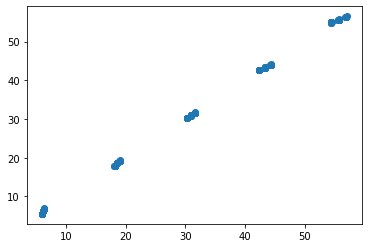

In [42]:
plt.scatter(y_pp_occ_mean, pp_lm_occ_mean.predict(X_pp_noq))

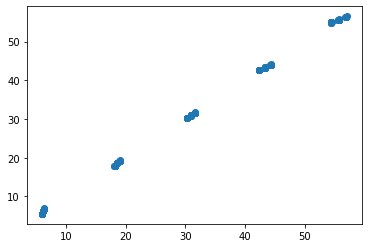

In [49]:
plt.scatter(y_pp_occ_p95, pp_lm_occ_p95.predict(X_pp_noq))

In [43]:
scores = cross_val_score(pp_lm, X_pp_noq, y_pp_occ_mean, cv=5)

In [44]:
scores

array([0.99680496, 0.99934405, 0.99998523, 0.99725337, 0.99823083])

In [48]:
y_mean_pct_blocked_by_pp
pp_lm_occ_p95 = LinearRegression()

pp_lm_occ_p95.fit(X_pp_noq, y_pp_occ_p95)

print(f"Full dataset score: {pp_lm_occ_p95.score(X_pp_noq, y_pp_occ_p95):.3f}")

Full dataset score: 1.000
